# Webscraping : IMDb Top 250 Movies

This is a project that mainly showcases how Python Libraries are used to webscrape static websites to create a dataframe that can be saved as well as perform other operations like sentimental analysis

The website that was chosen is **IMDb** with a webpage having a table with **Top 250 Movies ordered in accordance to Rating**

https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=6ABM4MGKKEFMTW15T5CY&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_ql_3')


## 1. Tabular and Tidy Data

#### 1.1. Importing Libraries

    Pandas and Matplotlib       -   dataframe manipulation and visualization
    BeautifulSoup and Requests  -   reading html syntax and webscraping

In [186]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

#### 2.1 Checking URL 


In [191]:
try:
    source = requests.get('https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=6ABM4MGKKEFMTW15T5CY&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_ql_3')

#checking the URL to capture error

    source.raise_for_status
    
except Exception as e:
    print(e)
    

#### 3.1 Getting the URL and parsing it using HTML

In [221]:
source = requests.get('https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=6ABM4MGKKEFMTW15T5CY&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_ql_3')

    
#Getting the URL and parsing it using HTML
soup = BeautifulSoup(source.text, 'html.parser')

#### 4.1 Finding the table with the movies

In [243]:
movies = soup.find('tbody', class_='lister-list').find_all('tr')
print(movies)
#We are getting the whole table content

[<tr>
<td class="posterColumn">
<span data-value="1" name="rk"></span>
<span data-value="9.234852154295902" name="ir"></span>
<span data-value="7.791552E11" name="us"></span>
<span data-value="2651761" name="nv"></span>
<span data-value="-1.7651478457040977" name="ur"></span>
<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>
</a> </td>
<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
<span class="secondaryInfo">(1994)</span>
</td>
<td class="ratingColumn imdbRating">
<strong title="9.2 based on 2,651,761 user ratings">9.2</strong>
</td>
<td class="ratingColumn">
<div class="seen-widget seen-widget-tt0111161 pending" data-titleid="tt0111161">
<div class="boundary">
<div class="popover">
<span 

#### 5.1 Time to narrow down

In [198]:
movies = soup.find('tbody', class_='lister-list').find_all('tr')
print(len(movies))

250


The number of rows present in the table is **250**.

#### 5.1.1 Getting the first movie:

In [244]:
for movie in movies:
        print(movie)
        break

<tr>
<td class="posterColumn">
<span data-value="1" name="rk"></span>
<span data-value="9.234852154295902" name="ir"></span>
<span data-value="7.791552E11" name="us"></span>
<span data-value="2651761" name="nv"></span>
<span data-value="-1.7651478457040977" name="ur"></span>
<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>
</a> </td>
<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
<span class="secondaryInfo">(1994)</span>
</td>
<td class="ratingColumn imdbRating">
<strong title="9.2 based on 2,651,761 user ratings">9.2</strong>
</td>
<td class="ratingColumn">
<div class="seen-widget seen-widget-tt0111161 pending" data-titleid="tt0111161">
<div class="boundary">
<div class="popover">
<span c

 Narrowing down

In [245]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a
    
    print(name)
    break

<a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>


Finally after filtering out all the html code, the movie list is:

In [246]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    
    print(name)
    

The Shawshank Redemption
The Godfather
The Dark Knight
The Godfather Part II
12 Angry Men
Schindler's List
The Lord of the Rings: The Return of the King
Pulp Fiction
The Lord of the Rings: The Fellowship of the Ring
Il buono, il brutto, il cattivo
Forrest Gump
Fight Club
Inception
The Lord of the Rings: The Two Towers
The Empire Strikes Back
The Matrix
Goodfellas
One Flew Over the Cuckoo's Nest
Se7en
Shichinin no samurai
It's a Wonderful Life
The Silence of the Lambs
Cidade de Deus
Saving Private Ryan
La vita è bella
Interstellar
The Green Mile
Star Wars
Terminator 2: Judgment Day
Back to the Future
Sen to Chihiro no kamikakushi
Psycho
The Pianist
Gisaengchung
Léon
The Lion King
Gladiator
American History X
The Departed
The Usual Suspects
The Prestige
Whiplash
Casablanca
The Intouchables
Seppuku
Hotaru no haka
Modern Times
Once Upon a Time in the West
Rear Window
Alien
City Lights
Nuovo Cinema Paradiso
Apocalypse Now
Memento
Raiders of the Lost Ark
Django Unchained
WALL·E
The Lives of 

#### 5.1.2 Getting the rank

5.1.2.1 Extracting the unclean data

In [207]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').text
    
    print(rank)
    break


      1.
      The Shawshank Redemption
(1994)



5.1.2.2 Putting the data in the right format to extract it as a list

In [208]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True)
    
    print(rank)
    break

1.The Shawshank Redemption(1994)


5.1.2.3 Splitting it to create the list with 2 items

In [211]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')
    
    print(rank)
    break

['1', 'The Shawshank Redemption(1994)']


5.1.2.4 Finally getting the rank

In [212]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')[0]
    
    print(rank)
    break

1


#### 5.1.3 Getting the Year

In [213]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')[0]
    year = movie.find('td', class_='titleColumn').span.text.strip('()')
    
    
    print(year)
    break

1994


#### 5.1.4 Getting the rating

In [214]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')[0]
    year = movie.find('td', class_='titleColumn').span.text.strip('()')
    rating = movie.find('td', class_='ratingColumn imdbRating').strong.text
    
    print(rating)
    break

9.2


#### 5.1.5 Finally, printing them all together ( name, rank, year and rating)

In [216]:
for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')[0]
    year = movie.find('td', class_='titleColumn').span.text.strip('()')
    rating = movie.find('td', class_='ratingColumn imdbRating').strong.text
    
    t = [name, rank, year, rating]
    print(name, rank, year, rating)
    

The Shawshank Redemption 1 1994 9.2
The Godfather 2 1972 9.2
The Dark Knight 3 2008 9.0
The Godfather Part II 4 1974 9.0
12 Angry Men 5 1957 9.0
Schindler's List 6 1993 8.9
The Lord of the Rings: The Return of the King 7 2003 8.9
Pulp Fiction 8 1994 8.8
The Lord of the Rings: The Fellowship of the Ring 9 2001 8.8
Il buono, il brutto, il cattivo 10 1966 8.8
Forrest Gump 11 1994 8.8
Fight Club 12 1999 8.7
Inception 13 2010 8.7
The Lord of the Rings: The Two Towers 14 2002 8.7
The Empire Strikes Back 15 1980 8.7
The Matrix 16 1999 8.7
Goodfellas 17 1990 8.7
One Flew Over the Cuckoo's Nest 18 1975 8.6
Se7en 19 1995 8.6
Shichinin no samurai 20 1954 8.6
It's a Wonderful Life 21 1946 8.6
The Silence of the Lambs 22 1991 8.6
Cidade de Deus 23 2002 8.6
Saving Private Ryan 24 1998 8.6
La vita è bella 25 1997 8.6
Interstellar 26 2014 8.6
The Green Mile 27 1999 8.6
Star Wars 28 1977 8.6
Terminator 2: Judgment Day 29 1991 8.5
Back to the Future 30 1985 8.5
Sen to Chihiro no kamikakushi 31 2001 8.5


#### 5.2 Creating a list to get the items

In [248]:
movie_list = []

for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')[0]
    year = movie.find('td', class_='titleColumn').span.text.strip('()')
    rating = movie.find('td', class_='ratingColumn imdbRating').strong.text
    
    movie_list.append([name, year, rank, rating])

movie_list


[['The Shawshank Redemption', '1994', '1', '9.2'],
 ['The Godfather', '1972', '2', '9.2'],
 ['The Dark Knight', '2008', '3', '9.0'],
 ['The Godfather Part II', '1974', '4', '9.0'],
 ['12 Angry Men', '1957', '5', '9.0'],
 ["Schindler's List", '1993', '6', '8.9'],
 ['The Lord of the Rings: The Return of the King', '2003', '7', '8.9'],
 ['Pulp Fiction', '1994', '8', '8.8'],
 ['The Lord of the Rings: The Fellowship of the Ring', '2001', '9', '8.8'],
 ['Il buono, il brutto, il cattivo', '1966', '10', '8.8'],
 ['Forrest Gump', '1994', '11', '8.8'],
 ['Fight Club', '1999', '12', '8.7'],
 ['Inception', '2010', '13', '8.7'],
 ['The Lord of the Rings: The Two Towers', '2002', '14', '8.7'],
 ['The Empire Strikes Back', '1980', '15', '8.7'],
 ['The Matrix', '1999', '16', '8.7'],
 ['Goodfellas', '1990', '17', '8.7'],
 ["One Flew Over the Cuckoo's Nest", '1975', '18', '8.6'],
 ['Se7en', '1995', '19', '8.6'],
 ['Shichinin no samurai', '1954', '20', '8.6'],
 ["It's a Wonderful Life", '1946', '21', '8.

## 2. Data Wrangling with Pandas and Exploratory Data Analysis (EDA)

#### 2.1 Creating a dataframe using Pandas

In [218]:
movies_table = pd.DataFrame(movie_list, columns= ['Name', 'Year', 'Rank', 'Rating'])

Viewing the dataframe named movies_table

In [220]:
movies_table

,Name,Year,Rank,Rating
0,The Shawshank Redemption,1994,1,9.2
1,The Godfather,1972,2,9.2
2,The Dark Knight,2008,3,9.0
3,The Godfather Part II,1974,4,9.0
4,12 Angry Men,1957,5,9.0
...,...,...,...,...
245,Dersu Uzala,1975,246,8.0
246,Gandhi,1982,247,8.0
247,The Help,2011,248,8.0
248,Aladdin,1992,249,8.0


This part is where the data was summarized using its main characteristics using descriptive statistics and data visualization

#### 2.2 Exploring the dataset using head, info, shape and describe

In [222]:
print('-------------------------------------------------------------------')
print(movies_table.head())
print('-------------------------------------------------------------------')
print(movies_table.info())
print('-------------------------------------------------------------------')
print(movies_table.shape)
print('-------------------------------------------------------------------')
print(movies_table.describe())

-------------------------------------------------------------------
                       Name  Year Rank Rating
0  The Shawshank Redemption  1994    1    9.2
1             The Godfather  1972    2    9.2
2           The Dark Knight  2008    3    9.0
3     The Godfather Part II  1974    4    9.0
4              12 Angry Men  1957    5    9.0
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    250 non-null    object
 1   Year    250 non-null    object
 2   Rank    250 non-null    object
 3   Rating  250 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB
None
-------------------------------------------------------------------
(250, 4)
-------------------------------------------------------------------
                            Name  Year Rank Rating
count                      

From the results, we can see that the columns **Year, Rank and Rating** are in the wrong format

#### 2.2.1 Putting them in the right format using astype function with type **int**

In [223]:
movies_table['Rank'] = movies_table['Rank'].astype(int)
movies_table['Rating'] = movies_table['Rating'].astype(float)
movies_table['Year'] = movies_table['Year'].astype(int)

#### 2.2.2 Viewing the dataset now:

In [224]:
movies_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    250 non-null    object 
 1   Year    250 non-null    int32  
 2   Rank    250 non-null    int32  
 3   Rating  250 non-null    float64
dtypes: float64(1), int32(2), object(1)
memory usage: 6.0+ KB


#### 2.2.3 Saving the dataset to a csv file

In [249]:
movies_table.to_csv('C:/Users/moses.gwaza/Documents/a.csv', index=False)

### 3. Data visualization

This is the last section that was done to try to get certain insights from the dataframe created.

Questions were formulated to try to understand the data and these include:
   1.  Which top 15 rated movies have the highest Rating?
   2.  Which Ratings are common in the dataset?
   3. Which time period has the most top rated movies

#### 3.1 Which top 15 rated movies have the highest Rating?

Inorder to achieve this, the easiest way is to simply sort the dataframe using the sort values function in descending order of Rating

In [228]:
Sortedby_rating = movies_table.sort_values('Rating', ascending=False).head(15)
Sortedby_rating

,Name,Year,Rank,Rating
0,The Shawshank Redemption,1994,1,9.2
1,The Godfather,1972,2,9.2
2,The Dark Knight,2008,3,9.0
3,The Godfather Part II,1974,4,9.0
4,12 Angry Men,1957,5,9.0
5,Schindler's List,1993,6,8.9
6,The Lord of the Rings: The Return of the King,2003,7,8.9
7,Pulp Fiction,1994,8,8.8
8,The Lord of the Rings: The Fellowship of the Ring,2001,9,8.8
9,"Il buono, il brutto, il cattivo",1966,10,8.8


And finally plot a horizontal bar using pandas:

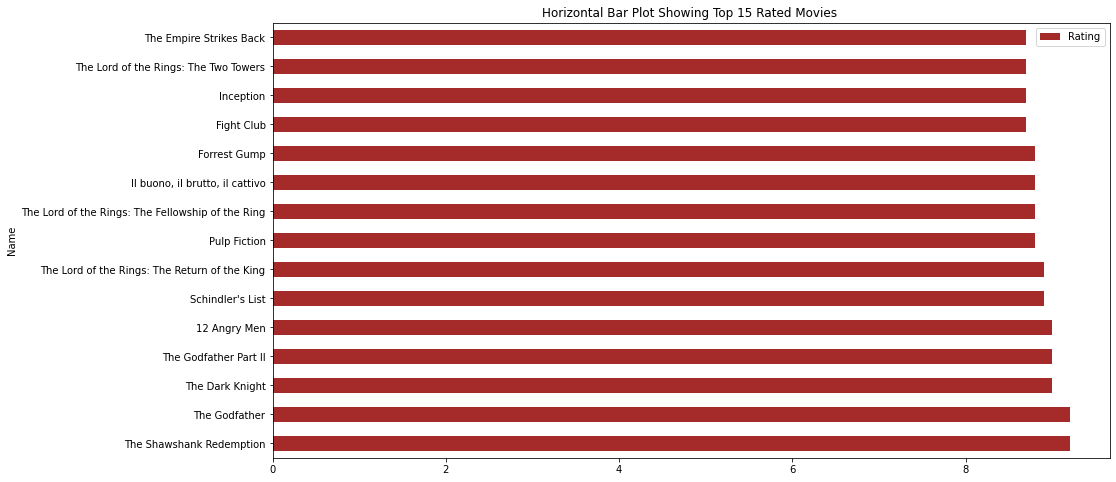

In [20]:

bar_presentation = (movies_table.head(15).
    
     plot.
     barh(
         x='Name',
         y='Rating', 
         color='brown', 
         figsize=(15, 8), 
         title = 'Horizontal Bar Plot Showing Top 15 Rated Movies ')
    )



#### 3.2 Which time period has the most top rated movies

3.2.1 Simply take a look at the **Year** column first to identify the overall time range

In [230]:
movies_table['Year']

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
245    1975
246    1982
247    2011
248    1992
249    1999
Name: Year, Length: 250, dtype: int32

3.2.2 Create categorical data from continuous data - Year using bins

In [232]:
#Creating bins
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1950 - 1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2030']

3.2.3 Adding a new calculated column named **Year_category** with the newly created categorical data

In [233]:
movies_table['Year_category'] = pd.cut(movies_table['Year'], bins, labels = labels)
movies_table

,Name,Year,Rank,Rating,Year_category
0,The Shawshank Redemption,1994,1,9.2,1990-2000
1,The Godfather,1972,2,9.2,1970-1980
2,The Dark Knight,2008,3,9.0,2000-2010
3,The Godfather Part II,1974,4,9.0,1970-1980
4,12 Angry Men,1957,5,9.0,1950 - 1960
...,...,...,...,...,...
245,Dersu Uzala,1975,246,8.0,1970-1980
246,Gandhi,1982,247,8.0,1980-1990
247,The Help,2011,248,8.0,2010-2020
248,Aladdin,1992,249,8.0,1990-2000


3.2.4 Performing simply descriptive analysis of our calculated column, Year_category using *describe function*

In [234]:
movies_table['Year_category'].describe()

count           222
unique            8
top       2000-2010
freq             48
Name: Year_category, dtype: object

3.2.5 Counting the number of items in a single category of  'Year_category'

In [237]:
count_items = movies_table['Year_category'].value_counts()
count_items

2000-2010      48
1990-2000      45
2010-2020      40
1980-1990      24
1970-1980      23
1950 - 1960    22
1960-1970      16
2020-2030       4
Name: Year_category, dtype: int64

3.2.6 Using a horizontal **bar plot** to represent the count

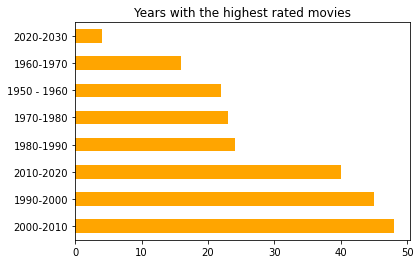

In [250]:
count_items.plot.barh(title = 'Years with the highest rated movies', color='orange');

3.2.7 Using a piechart plot to represent the count

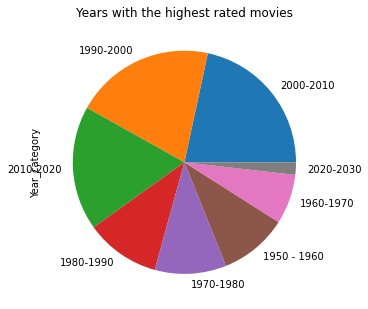

In [251]:
movies_table['Year_category'].value_counts().plot.pie(title = 'Years with the highest rated movies', figsize=(5, 7));

#### 3.3 Which Ratings are common in the dataset?

3.3.1 Using a histogram plot to represent the distribution

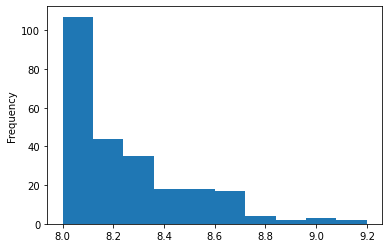

In [242]:
movies_table['Rating'].plot.hist();